# 2 Goal
### The notebooks aims to extract usefull insights from the data before injesting said data on knowlegde graph
### insights that will be extracted
    
0. columns and NaN value count

1. medicine
    * number of medicines in theraputic class
    * number of addicitive medicines


2. chemicals
    * most common chemical class
    * most common chemical in medicines
    * neurocns seems to have the most addictive maedicines
    

3. manufacturer (overall manufacturer trends)
    * type of medicine in which theraputic class
    * number of unique medicines produced by the manufacturer

By - Aryan Rathore

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib as mlp
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [2]:
df_med=pd.read_csv("a_to_z_medicine_data_web_scraping.csv", index_col=0)

In [3]:
df_med.head()

,name,manufacturer,chemicals,uses,side_effects,Habit Forming,Therapeutic Class,Chemical Class,Action Class,MRP
0,Augmentin 625 Duo Tablet,Glaxo SmithKline Pharmaceuticals Ltd,Amoxycillin (500mg) + Clavulanic Acid (125mg),['Treatment of Bacterial infections'],"['Vomiting', 'Nausea', 'Diarrhea', 'Mucocutane...",No,ANTI INFECTIVES,NOT AVAIBLE,NOT AVAIBLE,452
1,Aricep 5 Tablet,Eisai Pharmaceuticals India Pvt Ltd,Donepezil (5mg),"[""Alzheimer's disease""]","['Nausea', 'Diarrhea', 'Insomnia (difficulty i...",No,NEURO CNS,Carbamate Derivative,Cholinesterase inhibitors - Alzheimer's disease,390
2,Avil 25 Tablet,Sanofi India Ltd,Pheniramine (25mg),"['Treatment of Allergic conditions', 'Treatmen...",['Sedation'],No,RESPIRATORY,Pyridines Derivatives,H1 Antihistaminics (First Generation),347
3,Azithral 500 Tablet,Alembic Pharmaceuticals Ltd,Azithromycin (500mg),['Treatment of Bacterial infections'],"['Nausea', 'Abdominal pain', 'Diarrhea']",No,ANTI INFECTIVES,Macrolides,Macrolides,105
4,Aciloc 150 Tablet,Cadila Pharmaceuticals Ltd,Ranitidine (150mg),['Treatment of Gastroesophageal reflux disease...,"['Headache', 'Diarrhea', 'Gastrointestinal dis...",No,GASTRO INTESTINAL,Aralkylamines Derivative,H2 Receptor Blocker,94


In [4]:
df_med.shape

(38074, 10)

In [7]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38074 entries, 0 to 38073
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               38074 non-null  object
 1   manufacturer       38074 non-null  object
 2   chemicals          38074 non-null  object
 3   uses               38074 non-null  object
 4   side_effects       38074 non-null  object
 5   Habit Forming      38074 non-null  object
 6   Therapeutic Class  38074 non-null  object
 7   Chemical Class     38074 non-null  object
 8   Action Class       38074 non-null  object
 9   MRP                38074 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 3.2+ MB


# --------------------------------------------------------------------------
# MEDICINES ANALYSIS

number of unique medicines in the dataset:  36819


Text(-4.1805555555555625, 0.5, 'Count')

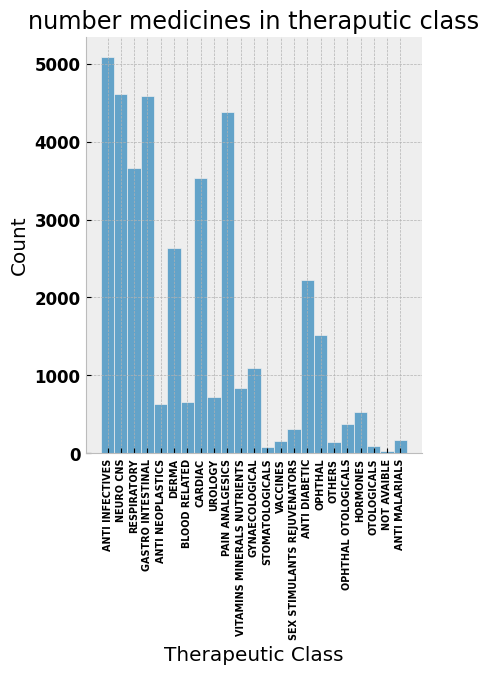

In [6]:
mlp.style.use("bmh")
print("number of unique medicines in the dataset: ", len(df_med.name.unique()))

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 12}

mlp.rc('font', **font)

sns.displot(df_med["Therapeutic Class"])
plt.xticks(rotation=90, fontsize="xx-small")
# df_med["Therapeutic Class"].hist(xrot=90, figsize=(15,3), grid=False, color = ['#00FFFF'], binbin=23)
plt.title("number medicines in theraputic class")
plt.ylabel("Count")


Text(-11.54, 0.5, 'Count')

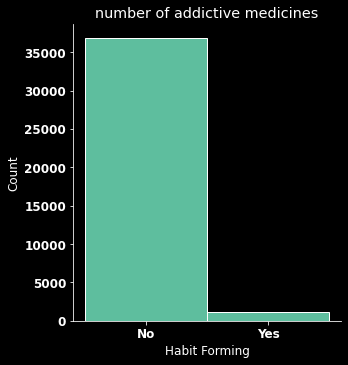

In [ ]:
sns.displot(x=df_med["Habit Forming"],color="#7FFFD4")
plt.title("number of addictive medicines")
plt.ylabel("Count")

In [41]:
# getting the ratio of habit forming to non-habit forming medicines
no=len(df_med.loc[df_med["Habit Forming"]=="No"])
yes=len(df_med.loc[df_med["Habit Forming"]=="Yes"])
print(str(no)+"/"+str(yes))

36877/1197


# --------------------------------------------------------------------------
# CHEMICALS ANALYSIS

In [ ]:
# 5) the has_chemical edge represented by med_chem_edge_df

med_chem_edge_df = pd.DataFrame(columns=['Medicine Name', 'chemicals', "concentration"])

for _, row in df_med[['name', 'chemicals']].iterrows():
    medicine_name = row['name']
    salt = row['chemicals']

    # Extract the drug components and their corresponding concentration in respective units
    components = [c.strip() for c in salt.split('+')]
    for component in components:

        string = component.split('(')
        drug = string[0].strip()
        concentration = string[-1].strip()

        concentration = "("+ concentration

        a = {
            'Medicine Name': medicine_name,
            'chemicals': drug,
            'concentration': concentration
        }
        # Append a new row to the new DataFrame
        med_chem_edge_df = med_chem_edge_df.append(a, ignore_index=True)

# Print the transformed DataFrame
med_chem_edge_df.head(5)

,Medicine Name,chemicals,concentration
0,Augmentin 625 Duo Tablet,Amoxycillin,(500mg)
1,Augmentin 625 Duo Tablet,Clavulanic Acid,(125mg)
2,Aricep 5 Tablet,Donepezil,(5mg)
3,Avil 25 Tablet,Pheniramine,(25mg)
4,Azithral 500 Tablet,Azithromycin,(500mg)


number of unique chemicals:  6344


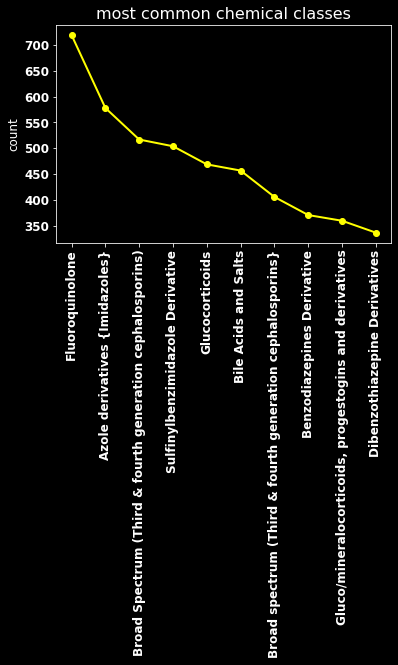

In [ ]:
print("number of unique chemicals: ", len(df_med["chemicals"].unique()))
a = pd.DataFrame(df_med["Chemical Class"].value_counts().sort_values(ascending=False)[0:10])
a.reset_index(inplace=True)

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 12}

mlp.rc('font', **font)

plt.plot(a["index"], a["Chemical Class"],color='yellow', marker='o', linewidth=2, markersize=6)
plt.xticks(rotation = 90)
plt.title("most common chemical classes")
plt.ylabel("count")
plt.grid(False)
plt.show()

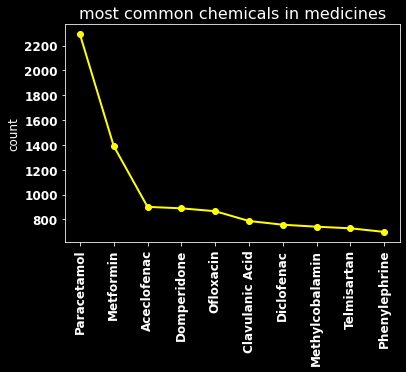

In [ ]:
a = pd.DataFrame(med_chem_edge_df["chemicals"].value_counts().sort_values(ascending=False)[0:10])
a.reset_index(inplace=True)

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 12}

mlp.rc('font', **font)

plt.plot(a["index"], a["chemicals"],color='yellow', marker='o', linewidth=2, markersize=6)
plt.xticks(rotation = 90)
plt.title("most common chemicals in medicines")
plt.ylabel("count")
plt.grid(False)
plt.show()

# --------------------------------------------------------------------------
# Neuro Cns theraputic class seems to have the most addictive meds

In [8]:
filt=df_med["Habit Forming"]=='Yes'
df_med.loc[filt]

,name,manufacturer,chemicals,uses,side_effects,Habit Forming,Therapeutic Class,Chemical Class,Action Class,MRP
14,Alprax 0.25 Tablet,Torrent Pharmaceuticals Ltd,Alprazolam (0.25mg),"['Treatment of Anxiety', 'Treatment of Panic d...","['Lightheadedness', 'Drowsiness']",Yes,NEURO CNS,Benzodiazepines Derivative,Benzodiazepines,356
23,Ativan 2mg Tablet,Pfizer Ltd,Lorazepam (2mg),"['Treatment of Short term anxiety', 'Treatment...","['Dizziness', 'Sedation', 'Injection site pain...",Yes,NEURO CNS,Benzodiazepines Derivative,Benzodiazepines,98
33,Ativan 1mg Tablet,Pfizer Ltd,Lorazepam (1mg),"['Treatment of Short term anxiety', 'Treatment...","['Dizziness', 'Sedation', 'Injection site pain...",Yes,NEURO CNS,Benzodiazepines Derivative,Benzodiazepines,274
36,Alprax 0.5mg Tablet,Torrent Pharmaceuticals Ltd,Alprazolam (0.5mg),"['Treatment of Anxiety', 'Treatment of Panic d...","['Lightheadedness', 'Drowsiness']",Yes,NEURO CNS,Benzodiazepines Derivative,Benzodiazepines,231
48,Amixide-H Tablet,Sun Pharmaceutical Industries Ltd,Amitriptyline (12.5mg) + Chlordiazepoxide (5mg),['Treatment of Depression'],"['Constipation', 'Difficulty in urination', 'W...",Yes,NEURO CNS,NOT AVAIBLE,NOT AVAIBLE,38
...,...,...,...,...,...,...,...,...,...,...
38022,Zozem 10mg Tablet,Zeelab Pharmacy Pvt Ltd,Zolpidem (10mg),['Treatment of Insomnia'],"['Dizziness', 'Sleepiness', 'Headache', 'Nause...",Yes,NEURO CNS,Imidazopyridine Derivative,Non-benzodiazepine hypnotics (Z Compounds),58
38025,Zunestar Tablet,HAB Pharma,Eszopiclone (3mg),['Insomnia'],"['Sleepiness', 'Dizziness', 'Headache', 'Taste...",Yes,NEURO CNS,Cyclopyrrolone Derivative,Non-benzodiazepine hypnotics (Z Compounds),295
38047,Zolipax 1mg Tablet SR,Reliance Formulation Pvt Ltd,Alprazolam (1mg),"['Treatment of Anxiety', 'Treatment of Panic d...","['Lightheadedness', 'Drowsiness']",Yes,NEURO CNS,Benzodiazepines Derivative,Benzodiazepines,395
38060,Zoltweet Forte Tablet,Tweet India Pharmaceuticals Pvt Ltd,Alprazolam (0.25mg) + Propranolol (20mg),['Anxiety disorder'],"['Confusion', 'Drowsiness', 'Memory impairment...",Yes,NEURO CNS,NOT AVAIBLE,NOT AVAIBLE,226


In [ ]:
filt=df_med["Habit Forming"]=='No'
no_list=set(df_med.loc[filt]['chemicals'].unique())
no_list

In [ ]:
filt=df_med["Habit Forming"]=='Yes'
yes_list=set(df_med.loc[filt]['chemicals'].unique())
yes_list

In [ ]:
print(yes_list.intersection(no_list)) # some chemicals maybe addictive

{'Buprenorphine (10mg)', 'Buprenorphine (5mg)'}


In [ ]:
df_med.shape

(38074, 9)

In [ ]:
df_med.columns

Index(['name', 'manufacturer', 'chemicals', 'uses', 'side_effects',
       'Habit Forming', 'Therapeutic Class', 'Chemical Class', 'Action Class'],
      dtype='object')

# --------------------------------------------------------------------------
# Manufacturers

In [ ]:
# number of unique manufacturers and their share
manu_share=dict(df_med.manufacturer.value_counts()[0:5])
keys=list(manu_share.keys())
values=list(manu_share.values())

In [ ]:
# for i in range(len(df_med.uses)):
#     list_from_string = ast.literal_eval(df_med.iloc[i,3])
#     df_med.iloc[i,3]=list_from_string

# for i in range(len(df_med.side_effects)):
#     list_from_string = ast.literal_eval(df_med.iloc[i,4])
#     df_med.iloc[i,4]=list_from_string

# df_med.to_csv("a_to_z_medicine_data_web_scraping.csv")

In [ ]:
# finding correslations between all the columns of the data
groups_manufacturer=df_med.groupby('manufacturer')

In [ ]:
type(groups_manufacturer)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
for i in df_med.manufacturer[0:10]:
    current_grp=groups_manufacturer.get_group(i)
    classes=dict(current_grp["Therapeutic Class"].value_counts()[0:10])
    print(i)
    print(classes)
    print("\n\n")




Glaxo SmithKline Pharmaceuticals Ltd
{'ANTI INFECTIVES': 50, 'DERMA': 47, 'RESPIRATORY': 21, 'PAIN ANALGESICS': 19, 'VACCINES': 16, 'NEURO CNS': 10, 'HORMONES': 8, 'GASTRO INTESTINAL': 6, 'ANTI NEOPLASTICS': 6, 'CARDIAC': 5}



Eisai Pharmaceuticals India Pvt Ltd
{'NEURO CNS': 13, 'ANTI NEOPLASTICS': 4, 'PAIN ANALGESICS': 3, 'GASTRO INTESTINAL': 2, 'VITAMINS MINERALS NUTRIENTS': 1, 'UROLOGY': 1}



Sanofi India Ltd
{'CARDIAC': 31, 'NEURO CNS': 29, 'ANTI DIABETIC': 22, 'VACCINES': 13, 'RESPIRATORY': 10, 'GASTRO INTESTINAL': 9, 'PAIN ANALGESICS': 8, 'BLOOD RELATED': 5, 'DERMA': 3, 'ANTI INFECTIVES': 3}



Alembic Pharmaceuticals Ltd
{'CARDIAC': 46, 'RESPIRATORY': 41, 'GASTRO INTESTINAL': 37, 'ANTI DIABETIC': 31, 'ANTI INFECTIVES': 27, 'PAIN ANALGESICS': 20, 'OPHTHAL': 16, 'UROLOGY': 15, 'GYNAECOLOGICAL': 15, 'NEURO CNS': 7}



Cadila Pharmaceuticals Ltd
{'GASTRO INTESTINAL': 40, 'ANTI INFECTIVES': 33, 'CARDIAC': 32, 'PAIN ANALGESICS': 22, 'RESPIRATORY': 21, 'NEURO CNS': 16, 'DERMA': 12, 

In [63]:
side_effect_all=[]
for side_effect in df_med['side_effects']:
    side_effect_list=ast.literal_eval(side_effect)
    side_effect_all=side_effect_all+side_effect_list

In [66]:
unique_side_effects=set(side_effect_all)

# more insights in pdf attached

# By - Aryan rathore, Reva Bharara